In [32]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv('boston_house_prices.csv')

<b>Explanation of Features</b>
* CRIM: per capita crime rate per town (assumption: if CRIM high, target small)
* ZN: proportion of residential land zoned for lots over 25,000 sq. ft (assumption: if ZN high, target big)
* INDUS: proportion of non-retail business acres per town (assumption: if INDUS high, target small)
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (categorical! assumption: if 1, target high)
* NOX:  nitrogen oxides concentration (parts per 10 million) (assumption: if NOX high, target small)
* RM: average number of rooms per dwelling.(assumption: if RM high, target big)
* AGE: proportion of owner-occupied units built prior to 1940. (assumption: if AGE high, target big)
* DIS: weighted mean of distances to five Boston employment centres. (assumption: if DIS high, target small)
* RAD: index of accessibility to radial highways. (assumption: if RAD high, target big)
* TAX: full-value property-tax rate per \$10,000. (assumption: if TAX high, target big)
* PTRATIO: pupil-teacher ratio by town. (assumption: if PTRATIO high, target big)
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. (assumption: if B high, target small)
* LSTAT: lower status of the population (percent). (assumption: if LSTAT high, target small)
* MEDV: median value of owner-occupied homes in \$1000s. (target)



In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
#to be checked
#empty values: no missing values
#min max of each column: see df.describe()
#any categories?: yes,CHAS
#distribution of target variable: normal
#decide what should be my first features: CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD


In [36]:
#get number of rows and columns
df.shape

(506, 14)

In [37]:
#get overview of dataset values
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [39]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
#change CHAS from int to categorical
df['CHAS'] = df.CHAS.astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null category
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


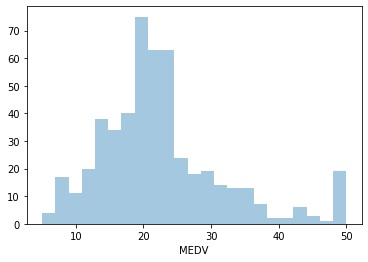

In [42]:
#check distribution of target variable
#looks like normal distribution, no need to do logarithm
sns.distplot(df.MEDV, kde=False)

In [43]:
#get number of rows in df
n = len(df)

#calculate proportions for training, validation and testing datasets
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#fix the random seed, so that results are reproducible
np.random.seed(2)
#create a numpy array with indices from 0 to (n-1) and shuffle it
idx = np.arange(n)
np.random.shuffle(idx)

#use the array with indices 'idx' to get a shuffled dataframe
#idx now becomes the index of the df,
#and order of rows in df is according to order of rows in idx
df_shuffled = df.iloc[idx]

#split shuffled df into train, validation and test
#e.g. for train: program starts from index 0
#until the index, that is defined by variable (n_train -1)
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [44]:
#create target variable arrays
y_train = df_train.MEDV.values
y_val = df_val.MEDV.values
y_test = df_test.MEDV.values

#remove target variable form df's
del df_train['MEDV']
del df_val['MEDV']
del df_test['MEDV']

In [45]:
#define first numerical features
#new training set only contains the selected base columns
#training set is transformed to matrix array with 'value' method
base = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']
df_num = df_train[base]
X_train = df_num.values

In [46]:
#return the weights
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
w_0, w = linear_regression(X_train, y_train)

#prediction of target variable, based on training set
y_pred = w_0 + X_train.dot(w)

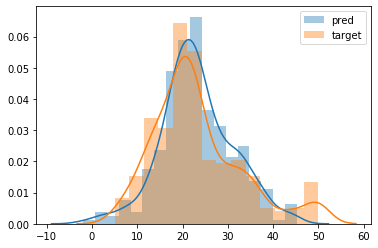

In [47]:
#the plot shows difference between distribution of
#real target variable and predicted target variable
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='target')
plt.legend()

In [48]:
#calculation of root mean squared error
#based on difference between distribution of
#real target variable and predicted target variable
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

5.838533879255301

Validating the Model

In [49]:
#create X_val matrix array
df_num = df_val[base]
X_val = df_num.values

In [50]:
#take the bias and the weights (w_0 and w), what we got from the linear regression
#and get the prediction of the target variable for the validation dataset
y_pred = w_0 + X_val.dot(w)

In [51]:
#compare y_pred with real target values 'y_val'
#that number should be used for comparing models
rmse(y_val, y_pred)

6.315378828176368

<b>prepare_X</b> function converts dataframe to matrix array

In [52]:
#this function takes in feature variables (base)，
#and returns a matrix array with 'values' method
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [53]:
#traub the model by calculating the weights
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

#apply model to validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

#compute RMSE on validation dataset
print('validation', rmse(y_val, y_pred))

validation 6.315378828176368


Feature engineering: Add more features to the model<br>
We use the validation framework to see whether more features improve the model

In [ ]:
#use prepare_X function to add more features
def prepare_X(df):
    base_02 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
    df_num = df[base_02]
    X = df_num.values